## LDA Tutorial

### simple run through

Lets start by creating some strings that will represent our documents

In [2]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

doc_complete = [doc1, doc2, doc3, doc4, doc5]

If you have never used nltk before you will have to first download the word libraries. The code below should downloaded the libraries needed for this tutorial.

In [54]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/bhart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/bhart/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/bhart/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/bhart/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Import the needed packages

In [39]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora

put our words and punctuation into sets to make the following processes easier. Also define our WordNetLemmatizer.

In [9]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

Prepare the docs by removing stop and punctuation character then normalize.

In [10]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [13]:
doc_clean = [clean(doc).split() for doc in doc_complete]

Great, now we have a cleaned corpus. We can now build out T term matrix. First we will create a dictionary of our corpus.

In [17]:
dictionary = corpora.Dictionary(doc_clean)

Now we can build our t term matrix using the dictionary.

In [20]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Now let us define our LDA model

In [22]:
Lda = gensim.models.ldamodel.LdaModel

Now lets train the model using out t term matrix

In [26]:
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=150)

In [27]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.064*"driving" + 0.064*"sister" + 0.064*"father"'), (1, '0.076*"sugar" + 0.075*"say" + 0.075*"health"'), (2, '0.057*"pressure" + 0.056*"father" + 0.056*"sister"')]


The results above represent 3 topics found in the corpus. The topics themselves require you to place meaning on them. In our example 0 could be family, 1 could represent opions of health and suger, and 3 could represent family again. 

### Possible Improvements

There exists a number of ways to improve the results.

#### frequency filtering

The idea here is to remove words that do not occur very often, i.e. have a low frequency.

In [44]:
doc_clean_flat = [val for sublist in doc_clean for val in sublist]

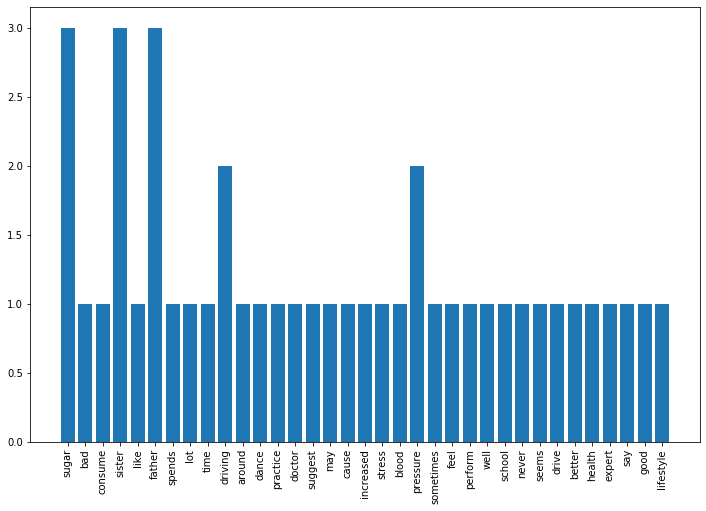

In [50]:
fig = plt.figure(figsize=(12,8))
plt.bar(x=Counter(doc_clean_flat).keys(), height=Counter(doc_clean_flat).values())
plt.xticks(rotation=90)
plt.show()

The this example, with its limited word count, we cannot use frequency filtering, doing so at the smallest frequency would only leave us with 5 individual words 13 words in total which is far too small to practically use for training.

#### Part of Speech Tag Filter

POS tag filter is more about the context of the features than frequencies of features. Topic Modelling tries to map out the recurring patterns of terms into topics. However, every term might not be equally important contextually.

In [59]:
POS_list = list()
for item in doc_clean_flat:
    tokenized = nltk.word_tokenize(item)
    tagged = nltk.pos_tag(tokenized)

    chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>}"""
    chunkParser = nltk.RegexpParser(chunkGram)

    chunked = chunkParser.parse(tagged)
    POS_list.append(chunked)

In [65]:
POS_list = [i[0] for i in POS_list]

In [69]:
POS_cat = [i[1] for i in POS_list]

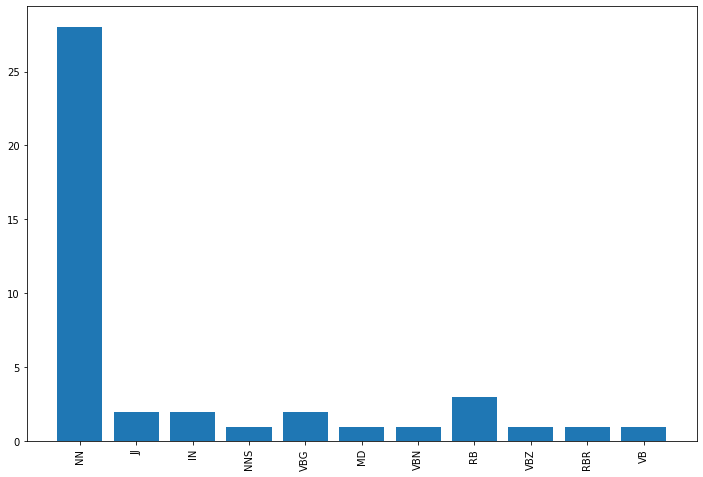

In [70]:
fig = plt.figure(figsize=(12,8))
plt.bar(x=Counter(POS_cat).keys(), height=Counter(POS_cat).values())
plt.xticks(rotation=90)
plt.show()

We could then remove IN (ex. within) and MD (ex. may) words as they are supporting words.